# Analysis of the 2020 Stack Overflow Annual Developer Survey Results

A group of investors want to start an IT firm. Given that they already have the legal permission to start an IT firm in any country or continent of their choice, they want to know the suitable country or continent they want to start the IT firm.

So they come to you with the as a data scientist with the data [Stack Overflow 2020 Survey](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/view) and the management wants answers to the following questions which will help them in their decisions.

<a id="problem-statements"></a>
## Problem Statements 
The three business problems are as follows:

1. How does the distribution of the respondents in the survey correspond to their  countries (resp. continents) and whether the distribution well represent the population of the countries (resp. continents)?

2. What are the most popular database environments (that are currently being worked on, and desired to be work in over the next year) among the respondents in the survey as well as those in countries that are mostly represented?

3. What are the most popular collaboration tools (that are currently being worked on, and desired to be work in over the next year) among the respondents in the survey as well as those in countries that are mostly represented?

<a id="toc"></a>
## Table of Contents

* [ ] [<font color=blue>Importing Relevant Python Packages</font>](#importing-relevant-python-packages)
[comment]: <> (Something)
* [ ] [<font color=blue>Importing Relevant Data</font>](#importing-relevant-data)
[comment]: <> (Something)
* [ ] [<font color=blue>Exploration Question 1: Distribution of the respondents according to countries and continents</font>](#exp-qxn-1)
    * [<font color=blue>Exploration Question 1.1</font>](#exp-qxn-1-1)
    * [<font color=blue>Exploration Question 1.2</font>](#exp-qxn-1-2)
[comment]: <> (Something)    
* [ ] [<font color=blue>Exploration Question 2: Respondents Usage of Database Environment </font>](#exp-qxn-2)
    * [<font color=blue>Exploration Question 2.1</font>](#exp-qxn-2-1)
    * [<font color=blue>Exploration Question 2.2</font>](#exp-qxn-2-2)
    * [<font color=blue>Exploration Question 2.3</font>](#exp-qxn-2-3)
    * [<font color=blue>Exploration Question 2.4</font>](#exp-qxn-2-4)
[comment]: <> (Something)
* [ ] [<font color=blue>Exploration Question 3: Respondent Usage of Collaboration Tools</font>](#exp-qxn-3)
    * [<font color=blue>Exploration Question 3.1</font>](#exp-qxn-3-1)
    * [<font color=blue>Exploration Question 3.2</font>](#exp-qxn-3-2)
    * [<font color=blue>Exploration Question 3.3</font>](#exp-qxn-3-3)
    * [<font color=blue>Exploration Question 3.4</font>](#exp-qxn-3-4)
[comment]: <> (Something)
* [ ] [<font color=blue>Conclusion</font>](#conclusion)

<a id="importing-relevant-python-packages"></a>
## Importing Relevant Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='importing-relevant-data'></a>
## Importing Relevant Data

In [2]:
survey_results_2020 = pd.read_csv('./survey_results_public.csv')
survey_schema_2020 = pd.read_csv('./survey_results_schema.csv')

<a id='exp-qxn-1'></a>
## Exploration Question 1: Distribution of the respondents according to countries and continents

In this section, I will explore possible answers to the first question listed in the [Problem Statements](#problem-statements) section. Namely: 

> How does the distribution of the respondents in the survey correspond to their  countries (resp. continents) and whether the distribution well represents the population of the countries (resp. continents)?

<a id="exp-qxn-1-1"></a>
### Exploration Question 1.1: 

In this subsection, I will use the given dataset to answer the question given below:

> *How does the distribution of the respondents of the survey correspond to their countries?*

In other words, what is the percentage of Respondents according to their Countries? 

Observe that if there is insufficient respondents for a particular country, then that means it is not a well representation of the population of the country. 

I will use the *Country* column in the dataset assigned to the Python variable `survey_results_2020` to answer [Question 1.1](#exp-qxn-1-1) stated above. Let us get the question that was asked of the respondents for the column labelled *Country*.

In [3]:
def get_survey_question(col_name, schema = survey_schema_2020):
    """
    INPUT: 
    col_name: A string object which is a column name in the DataFrame schema.
    
    OUTPUT:
    A string object which is the posed question in the survey for col_name.
    
    """
    return list(schema[schema.Column == col_name]['QuestionText'])[0]

In [4]:
col_name = 'Country'
get_survey_question(col_name)

'Where do you live?'

In [5]:
# How many respondents in this survey?
print("Survey respondents                         : {0:<1}".format(survey_results_2020.shape[0]))

# How many respondents had NaN in the Country column?
cntry_nan_count = survey_results_2020.Country.isnull().sum()
print("Survey respondents with unspecified country: {0:<1}".format(cntry_nan_count))

Survey respondents                         : 64461
Survey respondents with unspecified country: 389


In [6]:
# Percentage of survey respondents without any country
print('Percentage of survey respondents without any country:', \
      np.round(cntry_nan_count / survey_results_2020.shape[0] * 100, 2))

Percentage of survey respondents without any country: 0.6


Since the percentage of respondents who failed to fill the country column is very small, i.e., $0.6\%$ which represents $389$ respondents, I will remove them.

In [7]:
not_nan_cntry_df = survey_results_2020.dropna(subset=['Country'], axis=0)

I noticed that some participants stated their country of orign as South Korea whiles others mentioned Republic of Korea. However, according the [wikipedia page](https://en.wikipedia.org/wiki/South_Korea), the Republic of Korea is the official name for South Korea. Thus they are the same. Therefore, I updated the dataset assigned to the Python variable `not_nan_country_df` by replacing *South Korea* with *Republic of Korea*.

In [8]:
not_nan_cntry_df.loc[not_nan_cntry_df['Country'] == 'South Korea'].head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
4899,4917,I am a developer by profession,No,40.0,35,Monthly,NaN,NaN,South Korea,South Korean won,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js;React.js;Vue.js,Angular.js;jQuery,Just as welcome now as I felt last year,35.0,1,1
5007,5026,I am a developer by profession,Yes,NaN,18,Monthly,3100.0,37200.0,South Korea,United States dollar,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",Angular;ASP.NET Core;jQuery;Spring,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery...,NaN,40.0,19,14
5311,5330,I am a developer by profession,Yes,28.0,16,Yearly,55000000.0,46111.0,South Korea,South Korean won,...,Easy,Too long,No,"Computer science, computer engineering, or sof...",Express;Laravel;React.js;Symfony;Vue.js,Express;jQuery;Laravel;Symfony;Vue.js,Just as welcome now as I felt last year,36.0,10,5
5391,5412,I am a student who is learning to code,Yes,20.0,18,NaN,NaN,NaN,South Korea,NaN,...,Easy,Too long,No,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,3,NaN
5713,5737,I am a developer by profession,Yes,28.0,20,Yearly,100000000.0,83838.0,South Korea,South Korean won,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",React.js,React.js,Just as welcome now as I felt last year,10.0,8,4


In [9]:
not_nan_cntry_df.loc[not_nan_cntry_df['Country'] == 'Republic of Korea'].head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
4470,4486,I am a developer by profession,Yes,35.0,8,Monthly,4000000.0,40248.0,Republic of Korea,South Korean won,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,Angular,Just as welcome now as I felt last year,40.0,8,4
5187,5206,I am a developer by profession,Yes,20.0,13,Yearly,26000000.0,21798.0,Republic of Korea,South Korean won,...,Neither easy nor difficult,Appropriate in length,No,NaN,ASP.NET;ASP.NET Core;Express;React.js,ASP.NET;ASP.NET Core;Express;React.js;Vue.js,Just as welcome now as I felt last year,9.0,5,Less than 1 year
5200,5219,I code primarily as a hobby,Yes,21.0,11,NaN,NaN,NaN,Republic of Korea,NaN,...,Neither easy nor difficult,Too long,No,NaN,Django;React.js;Spring;Vue.js,NaN,Somewhat less welcome now than last year,NaN,10,NaN
5607,5629,I am a student who is learning to code,Yes,17.0,13,NaN,NaN,NaN,Republic of Korea,NaN,...,Easy,Appropriate in length,No,NaN,Express;Gatsby;React.js;Spring,Express;jQuery;React.js,Somewhat more welcome now than last year,NaN,4,NaN
5847,5871,I am a student who is learning to code,Yes,15.0,10,NaN,NaN,NaN,Republic of Korea,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Angular;Angular.js;React.js;Spring;Vue.js,NaN,A lot less welcome now than last year,NaN,3,NaN


In [10]:
not_nan_cntry_df.loc[not_nan_cntry_df.loc[:, 'Country'] == 'South Korea'] = 'Republic of Korea'

/home/mokai/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Now *South Korea* have been removed from the *Country* column in the dataset.

In [11]:
"South Korea" not in not_nan_cntry_df.Country

True

In the cell below, is a the function `count_column_reponses` which takes a pandas DataFrame and a colum name in the DataFrame and returns a new pandas DataFrame with a head count of the entries of the column name with their percentange.

In [12]:
def count_column_reponses(df, col_name):
    """
    INPUTS:
        df -- A pandas DataFrame with col_name as one of its columns.
        col_name -- A Python string object which is the column name of the column
        whose values are to be counted.
    
    OUTPUT:
        A new pandas DataFrame with the following columns:
        - col_name:  
        - Counts : Counts of items in col_name
        - Percent : Counts of item in col_name / Total count of column.
    """
    cnts = df[col_name].value_counts().values
    names = df[col_name].value_counts().index
    prcnt = np.round(cnts / np.sum(cnts) * 100, 2)
    new_df = pd.DataFrame({col_name:names, "Counts":cnts, "Percent":prcnt})
    return new_df

In [13]:
cntry_cnts = count_column_reponses(not_nan_cntry_df, col_name)
cntry_cnts.head()

,Country,Counts,Percent
0,United States,12469,19.46
1,India,8403,13.11
2,United Kingdom,3896,6.08
3,Germany,3890,6.07
4,Canada,2191,3.42


In the next cell, is a code that will help us to visualise the dataset assigned to the Python variable `cntry_cnts`. One can also change the value of the Python variable `prcnt_lbnd` for other outputs.

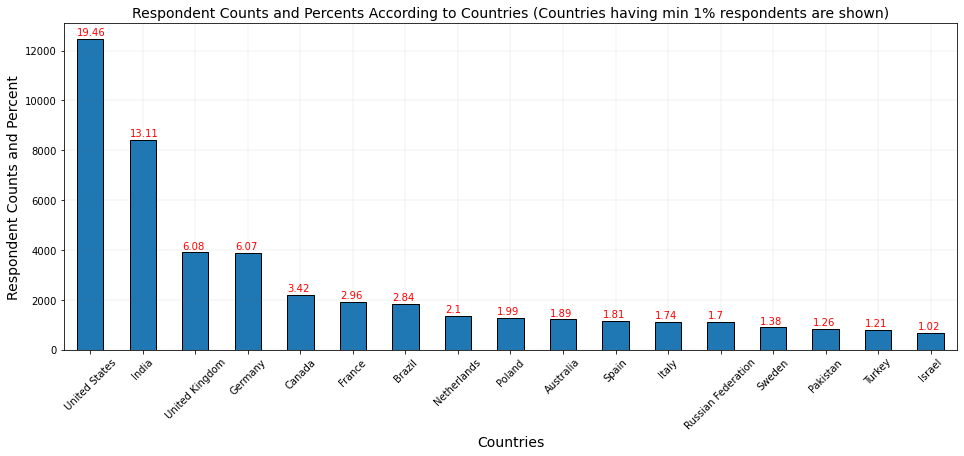

In [14]:
prcnt_lbnd = 1

# Sub-dataset of cntry_counts with percentage greater than prcnt_lbnd
filtered_cntry_cnts = cntry_cnts[cntry_cnts['Percent'] > prcnt_lbnd]

ax = filtered_cntry_cnts.plot(kind = "bar", 
                                  x = "Country", 
                                  y = "Counts", 
                                  legend = False, 
                                  figsize = (16, 6), 
                                  edgecolor = "black")
# initialise counter 
idx = 0

# for each bar in ax.patches
for bar in ax.patches:
    # Add the following text data to the bar
    ax.text((bar.get_x()),
           bar.get_height()+150,
           filtered_cntry_cnts.Percent.values[idx], 
           fontsize=10,
           color='red')
    # Increment idx by 1
    idx += 1 

plt.xlabel("Countries", fontsize = 14)
plt.ylabel("Respondent Counts and Percent", fontsize = 14)
plt.title("Respondent Counts and Percents According to Countries \
(Countries having min {0}% respondents are shown)".format(prcnt_lbnd), 
          fontsize=14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

From the graph, the United States which records $19.46 \%$ as the highest number of respondents. The next $4$ countries in descending order are India, the United Kingdom, Germany and Canada recording $13.11 \%$, $6.08 \%$, $6.07 \%$ and $3.42\%$ respectively. Thus, answering the [Question 1.1](#exp-qxn-1-1) posed above.

<a id="exp-qxn-1-2"></a>
### Exploration Question 1.2: 

From the above figure, the United States, India, the United Kingdom, Germany and Canada emerged as the top $5$ countries which is most represented in the survey. A follow up question based on the result of [Exploration Question 1.1](#exp-qxn-1-1) is the following: 

> 1. *How well does the countries with the highest number of respondent represent their country population?*
> 2. *Which continent has the highest number of respondents and how well does this represent the continent?*

In order to answer the first question of [Question 1.2](#exp-qxn-1-2), I will introduce a new quantity called *Respondent Density* which measures the density of the respondents with respect to the population of their respective countries. More precisely, it is given by the formula below:

$${\rm Respondent\,Density} = \frac{\rm Number\,of\,Respondents\,in\,a\,country}{\rm Population\,of\,Country}.$$
     
I will use the [population data for the year 2020](https://www.kaggle.com/tanuprabhu/population-by-country-2020) created by [Tanu N Prabhu](https://www.kaggle.com/tanuprabhu) and the [country-continent data](https://www.kaggle.com/statchaitya/country-to-continent) created by [Chaitanya Gokhale](https://www.kaggle.com/statchaitya) to answer all the questions posed in this subsection. 

In [15]:
# Loading country continent data
cntry_cntnt = pd.read_csv('country_continent.csv', encoding='latin-1')
cntry_cntnt.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [16]:
# Loading country population data for the year 2020
yr_2020_popltn = pd.read_csv('population_by_country_2020.csv')
yr_2020_popltn.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [17]:
# Take the columns Country (or dependency) and Population (2020) from the dataset 
# yr_2020_population

cntry_popltn_2020 = yr_2020_popltn[['Country (or dependency)', \
                                              'Population (2020)']]

# Rename the colums Country (or dependency) and Population (2020) to Country and 
# Population respectively.

cntry_popltn_2020 = cntry_popltn_2020.rename(columns={"Country \
(or dependency)": "Country", "Population (2020)": "Population"})

cntry_popltn_2020.head()

,Country,Population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


I noticed that some of the countries in the two datasets assigned to the Python variables `cntry_cnts` and `cntry_popltn_2020` respectively, have different names. As indicated in the subsequent cells. 

In [18]:
sorted(set.difference(set(cntry_cnts.Country), set(cntry_popltn_2020.Country)))

['Brunei Darussalam',
 'Cape Verde',
 'Congo, Republic of the...',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Hong Kong (S.A.R.)',
 'Kosovo',
 "Lao People's Democratic Republic",
 'Libyan Arab Jamahiriya',
 'Micronesia, Federated States of...',
 'Nomadic',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Saint Vincent and the Grenadines',
 'Swaziland',
 'Syrian Arab Republic',
 'The former Yugoslav Republic of Macedonia',
 'United Republic of Tanzania',
 'Venezuela, Bolivarian Republic of...',
 'Viet Nam']

A similar thing exist between the datasets assigned to the Python variables `cntry_cnts` and `cntry_cntnt`.

In [19]:
sorted(set.difference(set(cntry_cnts.Country), set(cntry_cntnt.country)))

['Bolivia',
 'Cape Verde',
 'Congo, Republic of the...',
 'Democratic Republic of the Congo',
 'Hong Kong (S.A.R.)',
 'Iran',
 'Kosovo',
 'Libyan Arab Jamahiriya',
 'Micronesia, Federated States of...',
 'Nomadic',
 'North Korea',
 'Republic of Korea',
 'Republic of Moldova',
 'Taiwan',
 'The former Yugoslav Republic of Macedonia',
 'United Kingdom',
 'United Republic of Tanzania',
 'United States',
 'Venezuela, Bolivarian Republic of...']

In the next two cells, I create a list to correct the mismatches in the *Country* column of the datasets in the Python variables `cntry_popltn_2020` and `cntry_cntnt`.

In [20]:
# corctng_lst = ["country name in cntry_cnt", "cntry_name in pop_df"]
corctng_lst = [['Brunei Darussalam','Brunei'], ['Cape Verde',  'Cabo Verde'],
                   ['Congo, Republic of the...',  'Congo'], 
                   ['Czech Republic', 'Czech Republic (Czechia)'], 
                   ['Democratic Republic of the Congo', 'DR Congo'], 
                   ['Hong Kong (S.A.R.)', 'Hong Kong'], ['Kosovo', "Kosovo"], 
                   ["Lao People's Democratic Republic",'Laos'], 
                   ['Libyan Arab Jamahiriya','Libya'], 
                   ['Micronesia, Federated States of...','Micronesia'], 
                   ['Nomadic',"Nomadic"],['Republic of Korea','South Korea'], 
                   ['Republic of Moldova', 'Moldova'], 
                   ['Russian Federation','Russia'], 
                   ['Saint Vincent and the Grenadines','St. Vincent & Grenadines'], 
                   ['Swaziland',"Eswatini"], ['Syrian Arab Republic','Syria'], 
                   ['The former Yugoslav Republic of Macedonia', 'North Macedonia'], 
                   ['United Republic of Tanzania','Tanzania'], 
                   ['Venezuela, Bolivarian Republic of...','Venezuela'], 
                   ['Viet Nam','Vietnam']]

for x, y in corctng_lst:
    cntry_popltn_2020.loc[cntry_popltn_2020.Country == y, "Country"] = x
    cntry_cntnt.loc[cntry_cntnt.country == y, "country"] = x

In [21]:
corctng_list = [['United States of America','United States'], 
                    ['United Kingdom of Great Britain and Northern Ireland', 
                     'United Kingdom'],
                    ['Iran (Islamic Republic of)',  'Iran'], 
                    ['Korea (Republic of)', 'Republic of Korea'], 
                    ['Congo (Democratic Republic of the)', \
                     'Democratic Republic of the Congo'],
                    ['Taiwan, Province of China', 'Taiwan'], 
                    ['Venezuela (Bolivarian Republic of)', \
                     'Venezuela, Bolivarian Republic of...'], 
                    ['Moldova (Republic of)', 'Republic of Moldova'], 
                    ['Bolivia (Plurinational State of)', 'Bolivia'], 
                    ['Macedonia (the former Yugoslav Republic of)', \
                     'The former Yugoslav Republic of Macedonia'], 
                    ['Tanzania, United Republic of', 'United Republic of Tanzania'],
                    ["Korea (Democratic People's Republic of)", 'North Korea'], 
                    ['Micronesia (Federated States of)', \
                     'Micronesia, Federated States of...'], ]


for x, y in corctng_list:
    cntry_cntnt.loc[cntry_cntnt.country == x, "country"] = y

In [22]:
for c in cntry_cnts.Country:
    for p in cntry_popltn_2020.Country:
        if c == p:
            cntry_cnts.loc[cntry_cnts['Country'] == c, 'Population'] = \
            cntry_popltn_2020.loc[cntry_popltn_2020['Country'] == \
                                               p, 'Population'].values
    for cn in cntry_cntnt.country:
        if c == cn:
            cntry_cnts.loc[cntry_cnts['Country'] == c, 'Continent'] = \
            cntry_cntnt.loc[cntry_cntnt['country'] == \
                                               cn, 'continent'].values

cntry_cnts.head()

,Country,Counts,Percent,Population,Continent
0,United States,12469,19.46,3.313410e+08,Americas
1,India,8403,13.11,1.382345e+09,Asia
2,United Kingdom,3896,6.08,6.794828e+07,Europe
3,Germany,3890,6.07,8.383097e+07,Europe
4,Canada,2191,3.42,3.779941e+07,Americas


Let's check if there are any missing data the Population or Continent columns.

In [23]:
cntry_cnts[cntry_cnts.Population.isnull() | cntry_cnts.Continent.isnull()]

,Country,Counts,Percent,Population,Continent
99,Kosovo,34,0.05,NaN,NaN
101,Nomadic,31,0.05,NaN,NaN


I will drop these two rows and change the data type of the *Population* column to `int`

In [24]:
cntry_cnts.dropna(inplace = True)
cntry_cnts.Population = cntry_cnts.Population.astype(int)
cntry_cnts.head()

,Country,Counts,Percent,Population,Continent
0,United States,12469,19.46,331341050,Americas
1,India,8403,13.11,1382345085,Asia
2,United Kingdom,3896,6.08,67948282,Europe
3,Germany,3890,6.07,83830972,Europe
4,Canada,2191,3.42,37799407,Americas


I add a new column _Respondent_Density * 100k_ to compute the *Respondent Density* for each country using the formula given above.  
Afterwards, I sort the resulting dataset in increasing order of magnitude of the values in the _Respondent_Density * 100k_ column.  

In [25]:
# Adding a new column, Respondent_Density*100k to the dataset assigned to the 
# Python variable cntry_cnts
cntry_cnts["Respondent_Density*100k"] = cntry_cnts.Counts/\
cntry_cnts.Population*100000 

# Sorting the dataset assigned to the Python variable cntry_cnts by the 
# Respondent_Density*100k column and assign the output to the variable 
# cntry_cnts_sorted
cntry_cnts_sorted = cntry_cnts.sort_values(by=['Respondent_Density*100k'], \
                                                   ascending=False)

# Show the most represented countries.
cntry_cnts_sorted[cntry_cnts_sorted['Percent'] > 1]

,Country,Counts,Percent,Population,Continent,Respondent_Density*100k
13,Sweden,886,1.38,10110233,Europe,8.763398
7,Netherlands,1343,2.10,17141544,Europe,7.834767
16,Israel,653,1.02,8678517,Asia,7.524327
4,Canada,2191,3.42,37799407,Americas,5.796387
2,United Kingdom,3896,6.08,67948282,Europe,5.733773
9,Australia,1208,1.89,25550683,Oceania,4.727858
3,Germany,3890,6.07,83830972,Europe,4.640290
0,United States,12469,19.46,331341050,Americas,3.763192
8,Poland,1278,1.99,37839255,Europe,3.377445
5,France,1898,2.96,65298930,Europe,2.906633


I will present a visual plot of the above dataset by plotting the countries against the Respondent Percent and the Respondent Density per country. Note that one can either decrease or increase the integer value assigned to the Python variable `prcnt_lbnd` to change the output of the plot in the next cell.

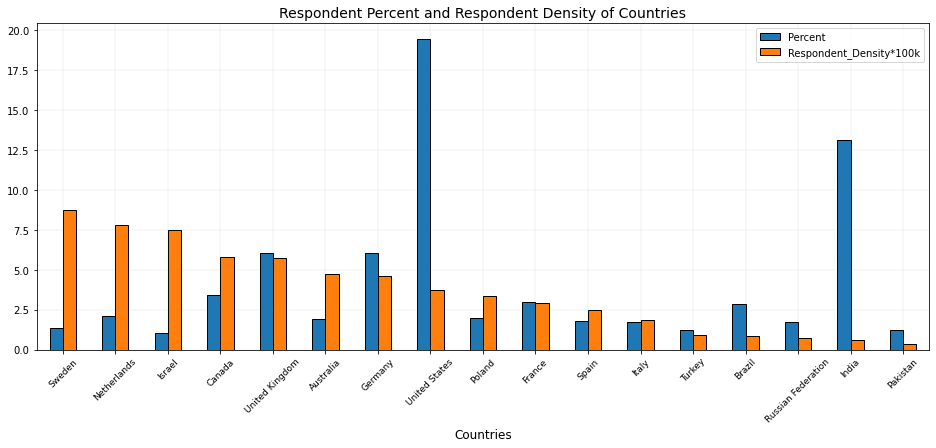

In [26]:
prcnt_lbnd = 1

cntry_cnts_sorted[cntry_cnts_sorted.Percent > prcnt_lbnd ].plot.bar(
    "Country", ["Percent", "Respondent_Density*100k"], figsize=(16,6), 
    edgecolor = "black")

plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Respondent Percent and Respondent Density of Countries", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Respondent Percent and Respondent Density of Countries")
plt.show()

From the above graph, we are able to answer the first follow-up question of [Question 1.2](#exp-qxn-1-2): 

>*How well does the countries with the highest number of respondent represent their country population?* 

  * It is clear from the above graph that, Sweden, the Netherlands, Israel, Canada and the United Kingdom are the most interested top $5$ countries. In other words, these countries had interest in the survey based on the respondents density measure. Thus, we can say that the number of respondents from these countries represent their population fairly well. 

  * On the other hand, although a major portion ($19.46\%$) of the respondent came from the United States, in terms of the respondent densities, it was ranked in the $8^{\rm th}$ position. Hence, we can say that citizens of the United States did not show much interest in the survey. A similar conclusion can be made for the country India which represents $13.11\%$ of the respondents. 
  
Next I will consider answering the second follow-up question of [Question 1.2](#exp-qxn-1-2); namely: 

> *Which continent has the highest number of respondents and how well does this represent the continent?*

In [27]:
from collections import defaultdict

cntnt_cnts_prcnt = defaultdict(list)

cntnt_cnts_prcnt['Continent'] = cntry_cnts.Continent.unique()

# for each continent in country_counts.Continent.unique()
for cont in cntry_cnts.Continent.unique():
    # Sum the respondent counts with cont as their continent
    cntnt_cnts_prcnt['Counts'].append(cntry_cnts[cntry_cnts.Continent == \
                                                       cont].Counts.sum())
    # Sum the respondent percentages with cont as their continent
    cntnt_cnts_prcnt['Percent'].append(cntry_cnts[cntry_cnts.Continent == \
                                                       cont].Percent.sum())
    # Sum the respondent population with cont as their continent
    cntnt_cnts_prcnt['Population'].append(cntry_cnts[cntry_cnts.Continent == \
                                                       cont].Population.sum())
    

cntnt_cnts_prcnt = pd.DataFrame(cntnt_cnts_prcnt)

cntnt_cnts_prcnt["Respondent_Density*100k"] = cntnt_cnts_prcnt.Counts/\
cntnt_cnts_prcnt.Population*100000 
cntnt_cnts_prcnt = cntnt_cnts_prcnt.sort_values(by=['Percent'], ascending=False)
cntnt_cnts_prcnt

,Continent,Counts,Percent,Population,Respondent_Density*100k
2,Europe,24688,38.50,747453169,3.302949
0,Americas,18640,29.08,1018816908,1.829573
1,Asia,16400,25.59,4642070032,0.353291
4,Africa,2709,4.21,1318406198,0.205475
3,Oceania,1570,2.44,41247565,3.806285


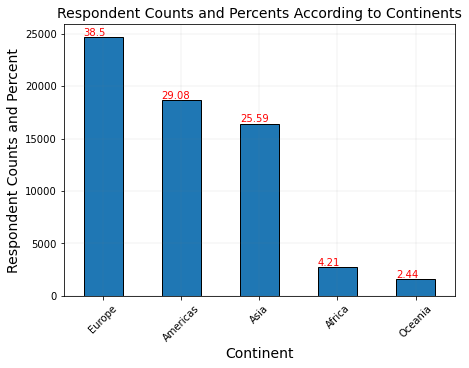

In [32]:
ax = cntnt_cnts_prcnt.plot(kind = "bar", 
                             x = "Continent", 
                             y = "Counts", 
                             legend = False, 
                             figsize = (7, 5), 
                             edgecolor = "black")
# initialise counter 
idx = 0

# for each bar in ax.patches
for bar in ax.patches:
    # Add the following text data to the bar
    ax.text((bar.get_x()),
           bar.get_height()+150,
           np.round(cntnt_cnts_prcnt.Percent.values[idx], 2), 
           fontsize=10,
           color='red')
    # Increment idx by 1
    idx += 1 

plt.xlabel("Continent", fontsize = 14)
plt.ylabel("Respondent Counts and Percent", fontsize = 14)
plt.title("Respondent Counts and Percents According to Continents", 
          fontsize=14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

From the graph, we see that the continent with the highest number of respondents of the survey is the European continent with $38.5\%$, followed by the Americas, Asia, Africa, and Oceania recording $25.59\%$, $29.08\%$, $2.44\%$ respectively.

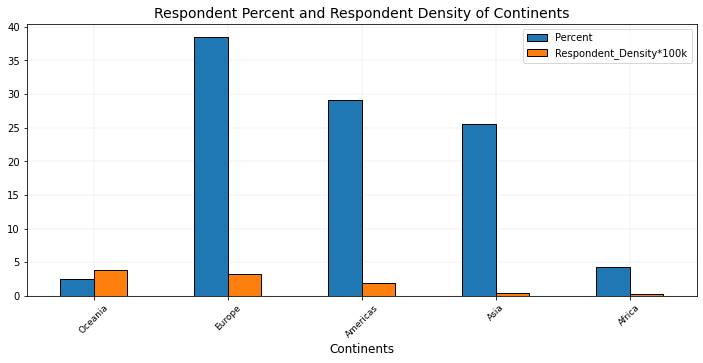

In [33]:
cntnt_cnts_prcnt = cntnt_cnts_prcnt.sort_values(by=['Respondent_Density*100k'], 
                                                ascending=False)
cntnt_cnts_prcnt.plot.bar("Continent", ["Percent", "Respondent_Density*100k"], \
    figsize=(12,5), edgecolor = "black")

plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Continents", fontsize = 12)
plt.title("Respondent Percent and Respondent Density of Continents", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Respondent Percent and Respondent Density of Continents")
plt.show()

Looking at the graph above, we see that the Oceania continent has the highest respondent density. Thus, the respondents of the survey on from this continent expressed more interest in the survey as compared to other continents. Thus answering part $2$ of [Question 1.2](#exp-qxn-1-2).

<a id="exp-qxn-2"></a>
## Exploration Question 2: Respondents Usage of Database Environment 

In this section, I will explore possible answers to the second problem stated in the [Problem Statements](#problem-statements) section. Namely,

> *What are the most popular database environments (that are currently being worked on, and desired to be work in over the next year) among the respondents in the survey as well as those in countries that are mostly represented?*


Recall that by mostly represented countries, I mean the following countries:

In [30]:
top_cntry = list(cntry_cnts[cntry_cnts.Percent > 1].Country)

top_cntry

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Netherlands',
 'Poland',
 'Australia',
 'Spain',
 'Italy',
 'Russian Federation',
 'Sweden',
 'Pakistan',
 'Turkey',
 'Israel']

In [31]:
survey_results_2020.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

<a id="exp-qxn-2-1"></a>
### Exploration Question 2.1

I will begin by answering the first part of the question which is:

> *What are the database environments that is most popular among the respondents?*

In other to answer the [Question 2.1](#exp-qxn-2-1) above, I will use the column name *DatabaseWorkedWith* in the dataset assigned to the Python variable `survey_results_2020`. 

This question possed for this column is as follows:

In [32]:
col_name = 'DatabaseWorkedWith'
get_survey_question(col_name)

'Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

In [33]:
unansd = np.round(survey_results_2020[col_name].isnull().sum() / \
                  survey_results_2020[col_name].notnull().sum() * 100, 2)

print("{0} percent of the respondents did not answer the question with the colum name \
DatabaseWorkedWith.".format(unansd))

30.13 percent of the respondents did not answer the question with the colum name DatabaseWorkedWith.


I will create a sub-dataframe of the dataframe assigned to the Python variable `survey_results_2020` containing a count of the answers provided in the column `DatabaseWorkedWith`.

In [34]:
survey_results_2020[col_name].value_counts().reset_index()

,index,DatabaseWorkedWith
0,MySQL,3827
1,Microsoft SQL Server,3298
2,PostgreSQL,1937
3,SQLite,1313
4,Microsoft SQL Server;MySQL,1158
...,...,...
2803,Cassandra;MariaDB;Microsoft SQL Server;MySQL;O...,1
2804,Couchbase;Elasticsearch;Firebase;MongoDB;MySQL...,1
2805,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,1
2806,Cassandra;Elasticsearch;MariaDB,1


Since the **index** colum of the dataset above have some respondents mentioning they have used more than one database management system (DMBS), I will write a function to get the distinct responses mentioned by the respondents. In this case the distinct responses are the DMBS.

In [35]:
def get_distinct_responses(df, col_name):
    """
    INPUT:
    df - pandas DataFrame 
    col_name - A colum in df whose entries are string objects separated by the 
    semi-colon punctuation.
    
    OUTPUT:
    A list of strings.
    """
    return list(set(answer.strip() for answers in df[col_name] for \
                    answer in answers.split(';')))

In [36]:
def count_responses(df, col_name, plot_title, x_label='', y_label='', plot=True):
    """
    INPUT: 
    df - pandas Dataframe
    col_name - A colum in df whose entries are string objects separated by the 
    semi-colon punctuation.
    plot_title - A string object which is the title of a plot figure.
    x_label -  A string object which is the label on the x-axis of the plot figure. 
    Its defualt value is the empty string.
    y_label - A string object which is the label on the y-axis of the plot figure. 
    Its defualt value is the empty string.
    plot - Boolean object with default value True and in that case will display a 
    plotting figure. 
    
    OUTPUT: 
    db_df - pandas DataFrame with three columns - col_name (as index), count and 
    percentage. 
    """

    from collections import defaultdict
    db_dict = defaultdict(int)
    
    col_name_df = df[col_name].value_counts().reset_index()
    
    col_name_df.rename(columns={'index':col_name, col_name:'counts'}, inplace=True)
    
    dstnct_dbms = get_distinct_responses(col_name_df, col_name)
    
    # for each database mentioned in dstnct_dbms
    for database in dstnct_dbms:
        for idx in range(col_name_df.shape[0]):
            if database in col_name_df[col_name][idx]:
                db_dict[database] += int(col_name_df['counts'][idx])

    db_df = pd.DataFrame(pd.Series(db_dict)).reset_index()
    db_df.columns = [col_name, 'counts']
    db_df.sort_values('counts', ascending=False, inplace=True)
    db_df.set_index(col_name, inplace=True)
    db_df['percentage'] = db_df['counts'] / db_df['counts'].sum() * 100
    if plot:
        (db_df['percentage']).plot(kind='bar', 
                                   legend=None, 
                                   title=plot_title, 
                                   figsize=(14,5))
        plt.xlabel(x_label, fontsize = 14)
        plt.ylabel(y_label, fontsize = 14)
        plt.grid(axis="both", color="gray", linewidth=0.1)
        plt.xticks(rotation = 45, fontsize = 10)
        plt.savefig(plot_title)
        plt.show()
    return db_df

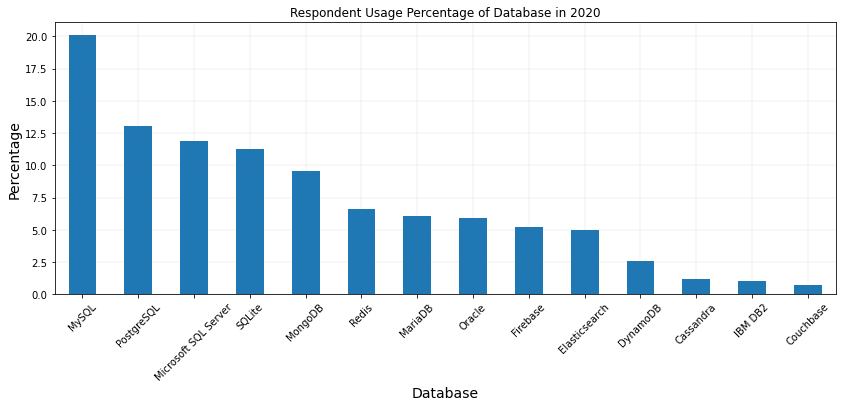

,counts,percentage
DatabaseWorkedWith,,
MySQL,27559,20.074444
PostgreSQL,17892,13.032837
Microsoft SQL Server,16336,11.899420
SQLite,15434,11.242388
MongoDB,13086,9.532065
Redis,9056,6.596544
MariaDB,8312,6.054602
Oracle,8155,5.940241
Firebase,7128,5.192156


In [37]:
x_label, y_label = 'Database', 'Percentage'

count_responses(survey_results_2020, col_name, \
                'Respondent Usage Percentage of Database in 2020', x_label, y_label)

* From the figure, we see that the most popular database environments that the respondents have done extensive development work in over the past year, i.e., until the year $2020$, is *MySQL*, recording $20.07\%$ of the respondents. The next four are: 

* *PostgreSQL* $(13.03\%)$; 
* *Microsoft SQL Server* $(11.90\%)$; 
* *SQLite* $(11.24\%)$; and 
* *MongoDB* $(9.53\%)$. 

<a id="exp-qxn-2-2"></a>
### Exploration Question 2.2

Next, I will provide answer(s) the second part of the question which is:

> *What are the database environments that is used extensively in most represented countries?*

I will still use the column name *DatabaseWorkedWith* in the dataset assigned to the Python variable `survey_results_2020` to provide answer(s) to [Question 2.2](#exp-qxn-2-2).

Recall again that the mostly represented countries are 

In [38]:
top_cntry

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Netherlands',
 'Poland',
 'Australia',
 'Spain',
 'Italy',
 'Russian Federation',
 'Sweden',
 'Pakistan',
 'Turkey',
 'Israel']

In [39]:
top_cntry_df = survey_results_2020[survey_results_2020.Country.isin(top_cntry)]
top_cntry_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4


In [40]:
def get_top_cntry_prcnt(df, col_cntry, col_db, top_cntry):
    """
    INPUT:
    df - pandas Dataframe
    col_cntry - A string object which is the column name in df refering to the 
    countries of the respondents.
    col_db - A string object which is the column name in df refering to the database
    environments used by the respondents. 
    top_cntry- A list object which contains names of countries as string 
    objects country which are the countries with the most number of respondents in 
    the survey. 
    
    OUTPUT:
    sorted_lang_percent_table:
    Overal Percentages of currently worked languages sorted as descending (as Series)
    country_lang_percent_df:
    Percentages of currently worked languages in Countries (as dataframe)
    lang_list:
    A list containing unique languages
    
    """
    
    # Get the sub dataframe of df with col_cntry and col_db as columns.
    db_df = df[[col_cntry, col_db]].dropna()
    
    dstnct_dbms = get_distinct_responses(db_df, col_db)
    
    # for each database environment in distinct_db_sys
    for db in dstnct_dbms:
        # Create a new column for db in db_df
        db_df[db] = db_df[col_db].str.split(';')
        
        # Update the newly created column by checking if db is 
        # mentioned as a database used by the respondent at a_row
        db_df[db] = [db in a_row for a_row in db_df[db]]
        
        # Update the new created column by replacing True by 1 and False by 0.
        db_df[db] = db_df[db].astype(int).replace({False: 0, True: 1})
    
    # Percentage of database environments
    sorted_db_prcnt_table = db_df.iloc[:,2:].mean().sort_values(ascending = False)
    
    # Sort databases in descending 
    sorted_db = db_df.iloc[:,2:].mean().sort_values(ascending = False).index
    
    # Define a new list
    db_prcnt_list = []
    
    # for each country in top_cntry
    for cntry in top_cntry:
        cntry_db_prcnt = db_df[db_df.Country == cntry].iloc[:,2:].mean().reindex(sorted_db)
        db_prcnt_list.append(cntry_db_prcnt)
        
    cntry_db_prcnt_df = pd.concat(db_prcnt_list, axis=1)
    cntry_db_prcnt_df.columns = top_cntry
    
    cntry_db_prcnt_df = pd.concat(db_prcnt_list, axis=1)
    cntry_db_prcnt_df.columns = top_cntry
    cntry_db_prcnt_df = cntry_db_prcnt_df.transpose()
    
    return sorted_db_prcnt_table, cntry_db_prcnt_df

In [41]:
col_cntry, col_db = ('Country', 'DatabaseWorkedWith')

dbms_prcnt_table_2020, cntry_dbms_prcnt_df_2020 = get_top_cntry_prcnt(top_cntry_df, 
                                                                      col_cntry, 
                                                                      col_db, 
                                                                      top_cntry)

In [42]:
dbms_prcnt_table_2020

MySQL                   0.533624
PostgreSQL              0.365591
Microsoft SQL Server    0.323251
SQLite                  0.305270
MongoDB                 0.259813
Redis                   0.186418
Oracle                  0.161279
MariaDB                 0.149388
Elasticsearch           0.144366
Firebase                0.132360
DynamoDB                0.078792
Cassandra               0.034634
IBM DB2                 0.029295
Couchbase               0.019049
dtype: float64

In the next cell, I will provide a visualation of the pandas Series assigned to the Python variable `dbms_prcnt_table_2020`. 

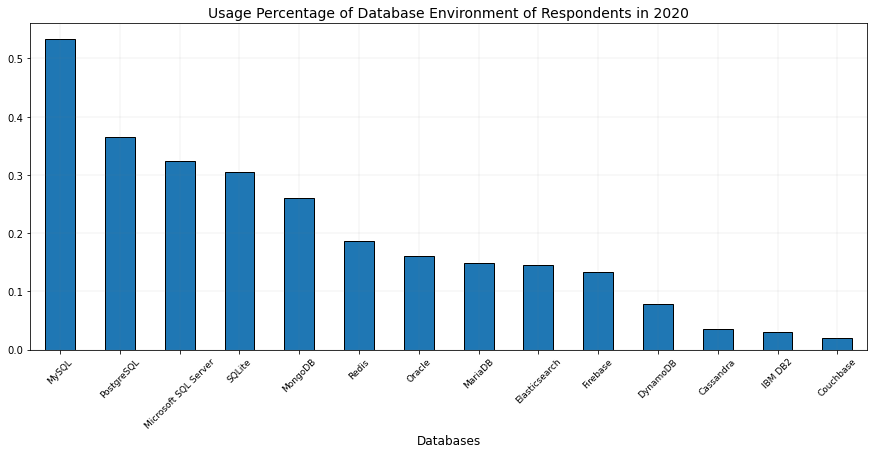

In [43]:
dbms_prcnt_table_2020.plot(kind='bar', figsize=(15,6), edgecolor = "black")

plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Databases", fontsize = 12)
plt.title("Usage Percentage of Database Environment of Respondents in 2020", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Usage Percentage of Database Environment of Respondents in 2020")
plt.show()

* From the graph above, it is obvious that the database environment that the respondents in the top represented countries have done most of their work over the past year, i.e., until the year $2020$, is *MySQL* with a usage of $53.36\%$ of the respondents from the top countries listed in the Python variable `top_cntry`.  
* The next four database environments that is used extensively among the respondents in the top represented countries are 
    * *PostgreSQL* ($36.56\%$); 
    * *Microsoft SQL Server* $(32.33\%)$; 
    * *SQLite* ($30.53\%$); and 
    * *MongoDB* ($25.98\%$).  
* It is interesting to know that although *MongoDB* is relatively young (see https://en.wikipedia.org/wiki/MongoDB) as compared to other database environments like Oracle DBMS, it has risen to the top five DBMS among the respondents from the top represented countries in this survey. 
* It will be interesting to know what the thoughts of the respondents from the top represented countries about *MongoDB* in the coming years. This will be explored further when I look at the follow-up question on the possible database management systems that the respondents want to work in over the next year. See [Exploration Question 2.3](#exp-qxn-2-3) below.

In [44]:
cntry_dbms_prcnt_df_2020

,MySQL,PostgreSQL,Microsoft SQL Server,SQLite,MongoDB,Redis,Oracle,MariaDB,Elasticsearch,Firebase,DynamoDB,Cassandra,IBM DB2,Couchbase
United States,0.456622,0.390454,0.381850,0.280037,0.225033,0.205060,0.129571,0.110417,0.147905,0.103042,0.104271,0.037079,0.032367,0.020998
India,0.703456,0.247147,0.242908,0.329149,0.311542,0.132377,0.224486,0.105804,0.099446,0.214379,0.058689,0.033746,0.027551,0.017444
United Kingdom,0.442634,0.314932,0.391753,0.250083,0.221151,0.188227,0.114400,0.134686,0.147323,0.083139,0.109744,0.027935,0.015298,0.019953
Germany,0.514066,0.420965,0.245144,0.357334,0.259879,0.182184,0.156397,0.260214,0.168788,0.088078,0.060616,0.032150,0.024782,0.024782
Canada,0.503768,0.397101,0.310145,0.274783,0.270725,0.198261,0.134493,0.128696,0.135652,0.126957,0.080580,0.028986,0.034203,0.011014
France,0.571331,0.470990,0.208874,0.316724,0.301706,0.200000,0.193857,0.242321,0.212969,0.111263,0.053925,0.044369,0.025939,0.020478
Brazil,0.570048,0.445135,0.328502,0.287095,0.306418,0.211870,0.218772,0.171843,0.135266,0.155280,0.082816,0.032436,0.037957,0.012422
Netherlands,0.552131,0.378966,0.345422,0.296464,0.236627,0.217588,0.108794,0.220308,0.188577,0.110607,0.058024,0.047144,0.021759,0.019039
Poland,0.464930,0.443888,0.289579,0.332665,0.246493,0.214429,0.182365,0.160321,0.181363,0.117234,0.037074,0.044088,0.029058,0.021042
Australia,0.461216,0.396226,0.393082,0.285115,0.213836,0.199161,0.118449,0.125786,0.137317,0.109015,0.146751,0.032495,0.025157,0.019916


In the next cell, I will provide a visualation of the top five database environments used in the top represented countries. 

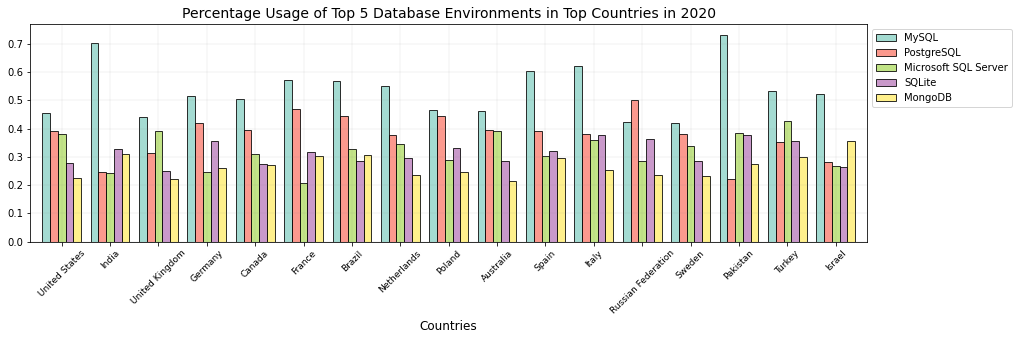

In [45]:
# Visualisation
top = 5
cntry_dbms_prcnt_df_2020.iloc[:,:top].plot.bar(figsize = (15,4), 
                                             width = 0.8, 
                                             colormap= "Set3", 
                                             edgecolor = "black", 
                                             alpha = 0.8)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Percentage Usage of Top {} Database Environments in Top Countries in \
2020".format(top), fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Percentage Usage of Top {} Database Environments in Top Countries in \
2020".format(top))
plt.show()

From our analysis, it is clear that the top $5$ DBMS used extensively among the respondents from the most represented countries are: 
  * MySQL 
  * PostgreSQL 
  * Microsoft SQL Server 
  * SQLite 
  * MongoDB  

as mentioned already. <hr>
* From the graph in the previous cell, we see that *MySQL* continues to be most extensively used database environments in the top countries, except for the Russian Federation where PostgreSQL is ranked first. We also see that MySQL is extensively used in Pakistan, India and Italy. 

* In all these countries, there is a competition among at least two of the top $5$ DBMS. Poland is the only country where MySQL has a competitor. Its competitor is *PostgreSQL*. In the United States, India, the Netherlands, Australia, Italy there is a competition between the use of PostgreSQL and Microsoft SQL Server. MongoDB is ranked second in Israel and competes with SQLite in Canada and France.

* It will be interesting to know what respondents expect the database usage trend will be in the following year. This is explored in [Exploration Question 3.3](#exp-qxn-3-3) below.

<a id="exp-qxn-2-3"></a>
### Exploration Question 2.3

Next, I will analyse the follow-up question to what I have just analysed. Namely: 

> *Which database environments would respondents want to be working in over the next year, i.e., in the year 2021?*

I will be concentrating on the column labelled `DatabaseDesireNextYear` in the dataset assigned to the Python variable `survey_results_2020`.

Let us take a look at the question possed for this column.

In [46]:
col_name = 'DatabaseDesireNextYear'
get_survey_question(col_name)

'Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

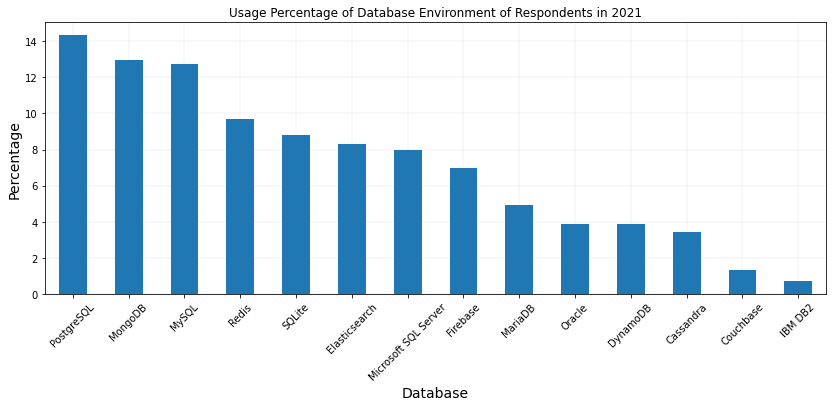

,counts,percentage
DatabaseDesireNextYear,,
PostgreSQL,17681,14.304669
MongoDB,16024,12.964087
MySQL,15734,12.729464
Redis,11977,9.689894
SQLite,10909,8.825838
Elasticsearch,10269,8.308051
Microsoft SQL Server,9876,7.990097
Firebase,8600,6.957760
MariaDB,6126,4.956190


In [47]:
x_label, y_label = 'Database', 'Percentage'

count_responses(survey_results_2020, col_name, \
                'Usage Percentage of Database Environment of Respondents in 2021', 
                x_label, y_label)

* Comparing the results with what was discovered when answering [Question 2.1](#exp-qxn-2-1), one can see that *PostgreSQL* has a high likelihood of being popular in $2021$ among the respondents from all over the world because it usage is expected to increased by $1.27\%$ to jump from the second position in $2020$ to be ranked first. 
* The next is *MongoDB* which jumped from the fifth position to the second position in $2021$ by a margin of $3.43\%$. This is a quiet a jump and a possible question to explore in the coming years is whether *MongoDB* will be the most popular database environment among respondents worldwide. 
* *MySQL* decreased by a margin of $7.36\%$ from the first position in $2020$ to the third position in $2021$. Thus, on the world wide scale, there is a high likelihood that *MySQL* will be less popular among the respondents in $2021$. 
* The next is *Redis* which ranked sixth among the respondents in $2020$. It increased by a margin of $3.09\%$ to be ranked as the fourth most popular database environment that is expected to be popular among the respondents on a world wide scale. It is second after *MongoBD* with quite a huge jump expected to gain popularity among the respondents. 
* Finally *SQLite* decreased by a margin of $2.41\%$ to move from the fourth position in $2020$ to the fifth position in $2021$. It is also loosing popularity on the world wide scale among the respondents. 


It is obvious that on the world wide scale, *Microsoft SQL Server* has a high likelihood of not being popular among the respondents since it dropped from the third position in $2020$ to the seventh position by a margin of $3.91\%$. 

<a id="exp-qxn-2-4"></a>
### Exploration Question 2.4

Next, I will provide answer(s) the second part of the question which is:

> *Which database environments would respondents from the most represented countries want to work in over the next year, i.e., in the year 2021?*

In [48]:
dbms_prcnt_table_2021, cntry_dbms_prcnt_df_2021 = get_top_cntry_prcnt(top_cntry_df, 
                                                                      col_cntry, 
                                                                      col_name, 
                                                                      top_cntry)

In [49]:
dbms_prcnt_table_2021

PostgreSQL              0.401085
MongoDB                 0.354693
MySQL                   0.340635
Redis                   0.271913
SQLite                  0.244908
Elasticsearch           0.236342
Microsoft SQL Server    0.219342
Firebase                0.175401
MariaDB                 0.123647
DynamoDB                0.118547
Cassandra               0.097067
Oracle                  0.095956
Couchbase               0.037696
IBM DB2                 0.019355
dtype: float64

In the next cell, I will provide a visualation of the pandas Series assigned to the Python variable `dbms_prcnt_table_2021`. 

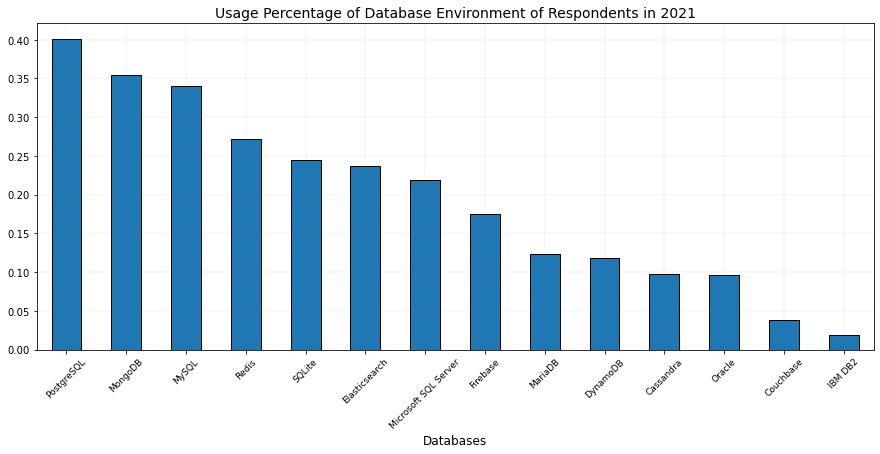

In [50]:
# Visualisation
dbms_prcnt_table_2021.plot(kind='bar', figsize=(15,6), edgecolor = "black")

plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Databases", fontsize = 12)
plt.title("Usage Percentage of Database Environment of Respondents in 2021", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Usage Percentage of Database Environment of Respondents in 2021")
plt.show()

* From the graph above, one can notice the top $5$ DBMS that respondents want to work in over the next year are: 
  * *PostgreSQL* — ($40.11\%$)
  * *MongoDB* — ($35.47\%$)
  * *MySQL* — ($34.06\%$)
  * *Redis* — ($27.19\%$)
  * *SQLite* — ($24.49\%$)

* Comparing the result above with the previous one, it is obvious that $4$ of the database which were popular among the respondents up until 2020 did make it to the year 2021 with a reshuffling of their rankings among the respondents. As compared to the previous result, *PostgreSQL* which was ranked second in the previous result increased by $3.55\%$ to be ranked as the first. *MongoDB* also increased by $9.49\%$ and moved from the fifth to be ranked the second. *MySQL* which was ranked first in the previous result decreased by $19.3\%$ to be ranked as third. *Redis* which was ranked sixth in the previous results, jumped to the forth rank with an increase of $8.55\%$ and *SQLite* which was ranked forth in the previous result decrease by $6.04\%$ to the fifth position.

* However, *Microsoft SQL Server* which was ranked third in the previous result, moved to the seventh position. Thus, it is likely that the *Microsoft SQL Server* will be loosing it popularity among these respondents in the year 2021. On the other hand, *MongoDB* and *Redis* are expected to gain popularity in the year 2021 than in the previous year. 

In [51]:
cntry_dbms_prcnt_df_2021

,PostgreSQL,MongoDB,MySQL,Redis,SQLite,Elasticsearch,Microsoft SQL Server,Firebase,MariaDB,DynamoDB,Cassandra,Oracle,Couchbase,IBM DB2
United States,0.437198,0.275150,0.292959,0.284114,0.234697,0.208633,0.266069,0.129378,0.093525,0.136101,0.086803,0.066281,0.039038,0.017573
India,0.296738,0.534199,0.469134,0.235356,0.272361,0.241670,0.179411,0.302175,0.110312,0.157489,0.150649,0.185724,0.060680,0.045072
United Kingdom,0.339555,0.293487,0.281176,0.270850,0.212073,0.220016,0.280381,0.106037,0.106434,0.131851,0.066322,0.052423,0.021048,0.005560
Germany,0.437982,0.283128,0.316641,0.242681,0.289676,0.223421,0.154083,0.092065,0.203005,0.064330,0.070108,0.063174,0.037365,0.008860
Canada,0.419009,0.330656,0.321954,0.282463,0.217537,0.222222,0.210843,0.169344,0.122490,0.102410,0.081660,0.062918,0.025435,0.016734
France,0.479018,0.313539,0.324624,0.278702,0.237530,0.330958,0.135392,0.157561,0.178939,0.053048,0.072842,0.075218,0.030879,0.011085
Brazil,0.457602,0.440789,0.359649,0.350146,0.225146,0.288012,0.199561,0.241959,0.149123,0.141082,0.116228,0.131579,0.025585,0.013158
Netherlands,0.398754,0.259605,0.336449,0.279335,0.207684,0.258567,0.237799,0.138110,0.155763,0.072690,0.084112,0.038422,0.014538,0.009346
Poland,0.449501,0.315205,0.281909,0.271920,0.223085,0.264151,0.209767,0.139845,0.115427,0.072142,0.102109,0.089900,0.022198,0.006659
Australia,0.435544,0.240300,0.269086,0.274093,0.224030,0.226533,0.247810,0.137672,0.096370,0.183980,0.067584,0.056320,0.020025,0.012516


In the next cell, I will provide a visualation of the top five database environments that repondents in the top represented countries want to work in over the next year, that is, the year $2021$.

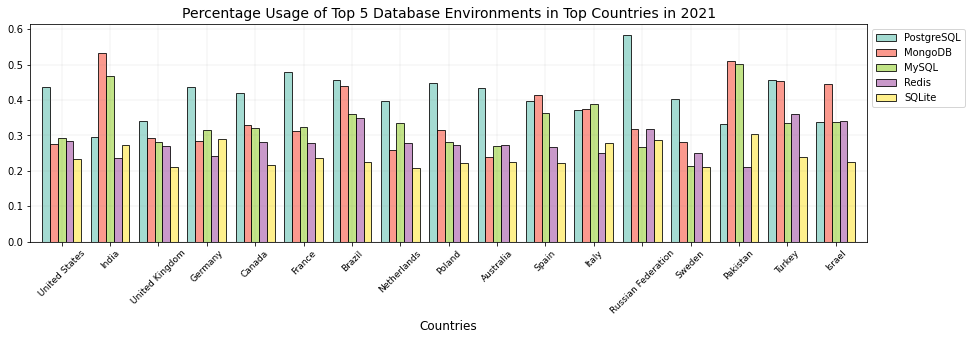

In [52]:
# Visualisation
top = 5
cntry_dbms_prcnt_df_2021.iloc[:,:top].plot.bar(figsize = (15,4), width = 0.8, 
                                               colormap= "Set3", edgecolor = "black", 
                                               alpha = 0.8)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Percentage Usage of Top 5 Database Environments in Top Countries in \
2021".format(top), fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Percentage Usage of Top {} Database Environments in Top Countries in \
2021".format(top))
plt.show()

* Comparing the graph above with that of the previous result, one can observe that *PostgreSQL* is still going to be popular in the year 2021 in the Russian Federation. Joining the Russian Federation are the United States, the United Kingdom, Germany, Canada, France, Brazil, the Netherlands, Poland, Australia, Sweden and Turkey. That is, there is a high likelihood that *PostgreSQL* will be popular among the respondents from these countries.

* *MongoDB* is expected to be the most popular DBMS in the year 2021 among the respondents in India, Spain, Pakistan, and Israel. In Turkey, Brazil, Spain, Italy, *MongoBD* competes with *PostgreSQL* but with *MySQL* in India and Pakistan.

* Italy is the only country where the respondents maintains the popularity of *MySQL*. Comparing this with that of the previous results, one can say that, it possible that it close competitors, PostgreSQL and MongoDB might take over.

<a id="exp-qxn-3"></a>
## Exploration Question 3

Finally I will explore possible answers to the final question of the [Problem Statements](#problem-statements), namely:

>*What are the most popular collaboration tools (that are currently being worked on, and desired to be work in over the next year) among the respondents in the survey as well as those in countries that are mostly represented?*

Recall again that by mostly represented countries, I mean the following countries:

In [53]:
top_cntry

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Netherlands',
 'Poland',
 'Australia',
 'Spain',
 'Italy',
 'Russian Federation',
 'Sweden',
 'Pakistan',
 'Turkey',
 'Israel']

<a id="exp-qxn-4-1"></a>
### Exploration Question 3.1

I will begin by considering answering the first part of the question which is:

> *What are the most popular collaboration tools among the respondents?*

I will use the column name *NEWCollabToolsWorkedWith* in the dataset assigned to the Python variable `survey_results_2020` to answer [Question 3.1](#exp-qxn-3-1) possed above.

This question possed for this column is as follows:

In [54]:
col_name = 'NEWCollabToolsWorkedWith' 
get_survey_question(col_name)

'Which collaboration tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you worked with the tool and want to continue to do so, please check both boxes in that row.)'

In [55]:
survey_results_2020[col_name].value_counts().reset_index()

,index,NEWCollabToolsWorkedWith
0,Github,4343
1,Github;Gitlab,1525
2,Confluence;Jira;Github;Slack;Google Suite (Doc...,1287
3,"Github;Google Suite (Docs, Meet, etc)",1217
4,Github;Slack,1208
...,...,...
1148,Jira;Github;Slack;Microsoft Azure;Trello;Stack...,1
1149,Confluence;Jira;Gitlab;Microsoft Teams;Stack O...,1
1150,Github;Slack;Microsoft Azure;Trello;Stack Over...,1
1151,Jira;Gitlab;Microsoft Azure;Stack Overflow for...,1


Observe that **index** colum of the dataset above have some respondents mentioning they have used more than one collaboration tools.

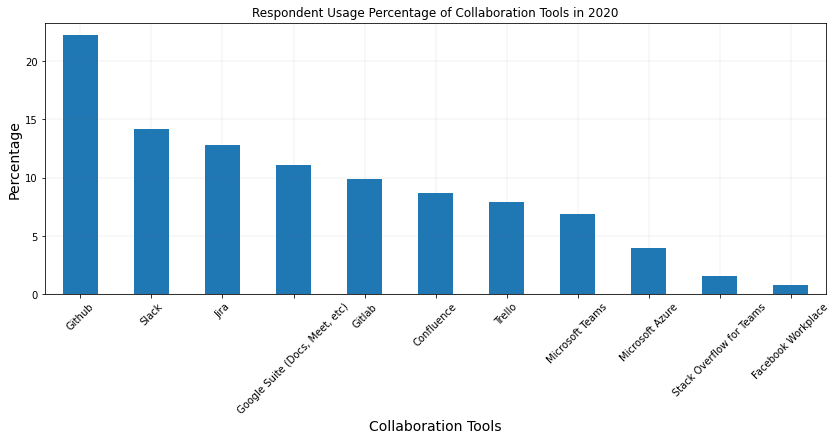

,counts,percentage
NEWCollabToolsWorkedWith,,
Github,43786,22.192150
Slack,28018,14.200422
Jira,25222,12.783319
"Google Suite (Docs, Meet, etc)",21952,11.125978
Gitlab,19545,9.906033
Confluence,17122,8.677979
Trello,15655,7.934456
Microsoft Teams,13518,6.851356
Microsoft Azure,7849,3.978125


In [56]:
x_label = 'Collaboration Tools'
y_label = 'Percentage'

count_responses(survey_results_2020, col_name, \
                'Respondent Usage Percentage of Collaboration Tools in 2020', x_label,\
                y_label)

From the graph and the datasets above, one can see that *Github* is the collaboration tool which is extensively used among the respondents of the survey until the end of $2020$. It recorded $22.19\%$ of the respondents. The next four collaboration tools are: 
* Slack — $14.20\%$
* Jira — $12.78\%$
* Google Suite (Docs, Meet, etc) — $11.13\%$
* Gitlab — $9.91\%$.

<a id="exp-qxn-3-2"></a>
### Exploration Question 3.2

Next, I will provide answer(s) the second part of the question which is:

> *What are the most popular collaboration tools used extensively in most represented countries?*

In [57]:
ct_prcnt_tab_2020, cntry_ct_prcnt_df_2020 = get_top_cntry_prcnt(top_cntry_df, 
                                                                col_cntry, col_name, 
                                                                top_cntry)

In [58]:
ct_prcnt_tab_2020

Github                            0.826974
Slack                             0.542369
Jira                              0.497492
Google Suite (Docs, Meet, etc)    0.424680
Gitlab                            0.357818
Confluence                        0.344957
Trello                            0.284125
Microsoft Teams                   0.263634
Microsoft Azure                   0.149546
Stack Overflow for Teams          0.054189
Facebook Workplace                0.025133
dtype: float64

In the next cell, I will provide a visualation of the pandas Series `ct_prcnt_tab_2020`. 

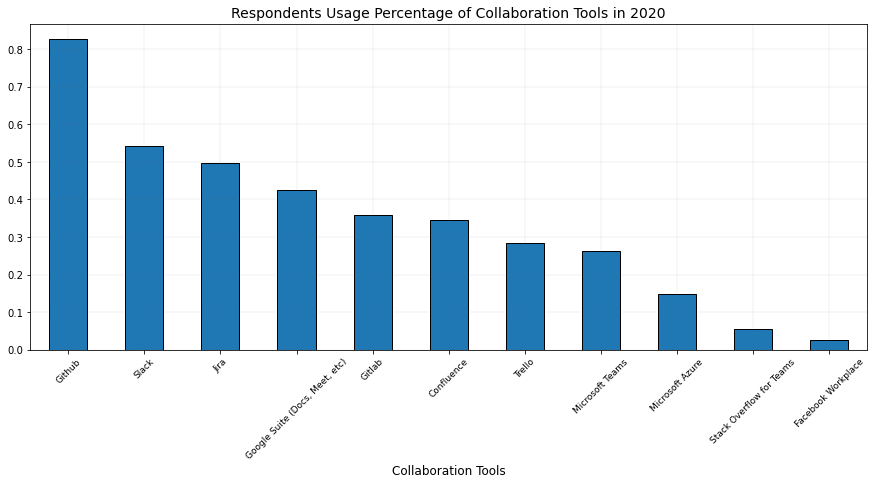

In [59]:
# Visualising 
ct_prcnt_tab_2020.plot(kind='bar',figsize=(15,6), edgecolor = "black")

plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Collaboration Tools", fontsize = 12)
plt.title("Respondents Usage Percentage of Collaboration Tools in 2020", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Respondents Usage Percentage of Collaboration Tools in 2020")
plt.show()

* From the graph above, it is obvious that the collaboration tool that the respondents in the top represented countries have done most of their work over the past year, i.e., until the year $2020$, is *Github* with a usage of $82.70\%$ of the respondents from the top countries listed in the Python variable `top_cntry`.  
* The next four collaboration tools that are used extensively among the respondents in the top represented countries are 
    * *Slack* — ($54.24\%$); 
    * *Jira* — $(49.75\%)$; 
    * *Google Suite (Docs, Meet, etc)* — ($30.53\%$); and 
    * *Gitlab* — ($35.78\%$). 

In [60]:
cntry_ct_prcnt_df_2020

,Github,Slack,Jira,"Google Suite (Docs, Meet, etc)",Gitlab,Confluence,Trello,Microsoft Teams,Microsoft Azure,Stack Overflow for Teams,Facebook Workplace
United States,0.834155,0.619113,0.506115,0.500000,0.266703,0.386546,0.239230,0.289248,0.173695,0.047280,0.016429
India,0.863690,0.411974,0.408760,0.345679,0.352275,0.197193,0.229663,0.202097,0.109758,0.126332,0.037714
United Kingdom,0.795858,0.580769,0.532840,0.407396,0.288757,0.389349,0.333728,0.336686,0.209172,0.040533,0.026036
Germany,0.804456,0.445324,0.561126,0.291996,0.503371,0.462914,0.240985,0.274993,0.122545,0.023160,0.007622
Canada,0.834289,0.635748,0.562272,0.529442,0.331944,0.411673,0.282439,0.258468,0.150599,0.039083,0.012507
France,0.827206,0.526348,0.452819,0.448529,0.592525,0.300858,0.360294,0.264706,0.091299,0.026348,0.032475
Brazil,0.847074,0.513298,0.402261,0.484043,0.413564,0.197473,0.515293,0.225399,0.137633,0.041223,0.051197
Netherlands,0.802345,0.611390,0.561977,0.435511,0.464824,0.403685,0.317420,0.294807,0.222781,0.034338,0.030151
Poland,0.791258,0.550401,0.619982,0.375558,0.468332,0.433541,0.296164,0.285459,0.136485,0.024086,0.022302
Australia,0.801700,0.616619,0.585458,0.455146,0.273843,0.484419,0.340888,0.318225,0.159585,0.037771,0.035883


In the next cell, I will provide a visualation of the top five collaboration tools that repondents have been extensively using until $2020$.

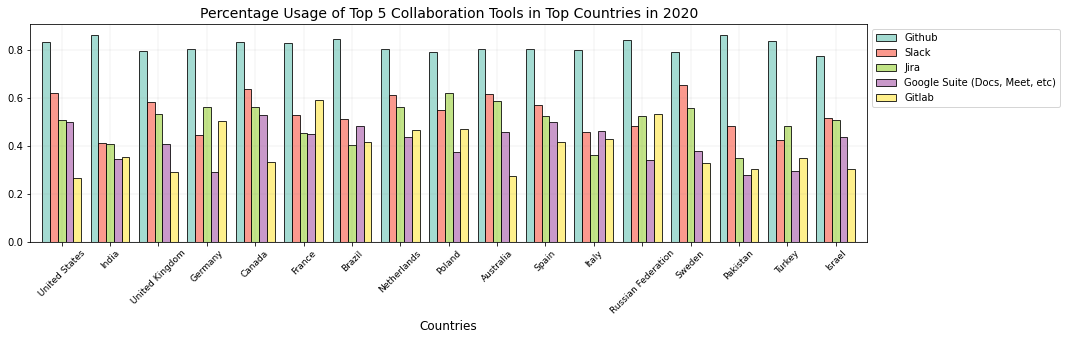

In [61]:
# Visualisation
top = 5
cntry_ct_prcnt_df_2020.iloc[:,:top].plot.bar(figsize = (15,4), width = 0.8, 
                                           colormap= "Set3", edgecolor = "black", 
                                           alpha = 0.8)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Percentage Usage of Top {} Collaboration Tools in Top Countries in \
2020".format(top), fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Percentage Usage of Top {} Collaboration Tools in Top Countries in \
2020".format(top))
plt.show()

From the graph above, one can observe that the most popular collaboration tool among the respondents from the most represented countries is *Github*. In the Russian Federation and France *Gitlab* is ranked as the second and *Jira* is ranked second in Turkey. In the rest of the countries, *Slack* is ranked second. Thus, *Github* and *Slack* are the most popular collaboration tools among the respondents from the most represented countries.

<a id="exp-qxn-3-3"></a>
### Exploration Question 3.3

Next, I will provides answer(s) to the question below:

> *What are the most popular collaboration tools that the respondents want to work in over the next year?*

I will use the column name *NEWCollabToolsDesireNextYear* in the dataset assigned to the Python variable `survey_results_2020` to answer [Question 3.3](#exp-qxn-3-3) possed above.

This question possed for this column is as follows:

In [62]:
col_name = 'NEWCollabToolsDesireNextYear' 
get_survey_question(col_name)

'Which collaboration tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you worked with the tool and want to continue to do so, please check both boxes in that row.)'

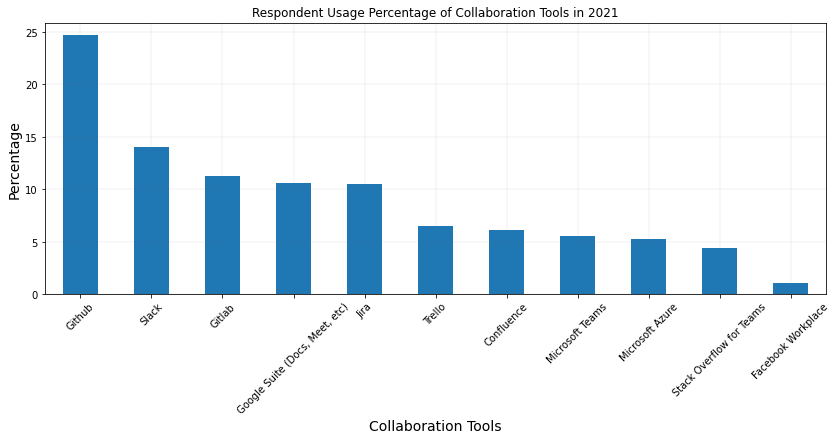

,counts,percentage
NEWCollabToolsDesireNextYear,,
Github,36996,24.657753
Slack,21119,14.075767
Gitlab,16974,11.313134
"Google Suite (Docs, Meet, etc)",15909,10.603314
Jira,15796,10.528000
Trello,9731,6.485690
Confluence,9153,6.100455
Microsoft Teams,8356,5.569256
Microsoft Azure,7877,5.250003


In [63]:
x_label = 'Collaboration Tools'
y_label = 'Percentage'

count_responses(survey_results_2020, col_name, \
                'Respondent Usage Percentage of Collaboration Tools in 2021', x_label,\
                y_label)

Comparing the results above with what was discovered when answering [Question 4.1](#exp-qxn-4-1), one can observe that *Github* will continue to be the most preferred collaboration tool that will be used extensively used among the respondents of the survey in 2021. It usage increased by $2.47\%$. The next is *Slack* which also maintain it rank but decreased by $0.12\%$. *Gitlab* is expected to gain popularity in 2021. In fact it jumped by $1.40\%$ from the fifth to the third position. *Google Suite (Docs, Meet, etc)* also maintained it position but is expected to loose popularity among respondents in 2021 by a small margin of $0.53\%$. The last among the top is *Jira* which is also expected decrease in popularity in 2021 by a margin of $2.25\%$.

<a id="exp-qxn-3-4"></a>
### Exploration Question 3.4

Next, I will provide answer(s) the final question:

>*What are the most popular collaboration tools that the respondents in most represented countries want to work in over the next year?*

In [64]:
ct_prcnt_tab_2021, cntry_ct_prcnt_df_2021 = get_top_cntry_prcnt(top_cntry_df, 
                                                               col_cntry, col_name, 
                                                               top_cntry)

In [65]:
ct_prcnt_tab_2021

Github                            0.784951
Slack                             0.455448
Gitlab                            0.347114
Google Suite (Docs, Meet, etc)    0.340844
Jira                              0.339314
Confluence                        0.198248
Trello                            0.196778
Microsoft Teams                   0.179797
Microsoft Azure                   0.165277
Stack Overflow for Teams          0.128915
Facebook Workplace                0.027061
dtype: float64

In the next cell, I will provide a visualation of the pandas Series `ct_prcnt_tab_2021`. 

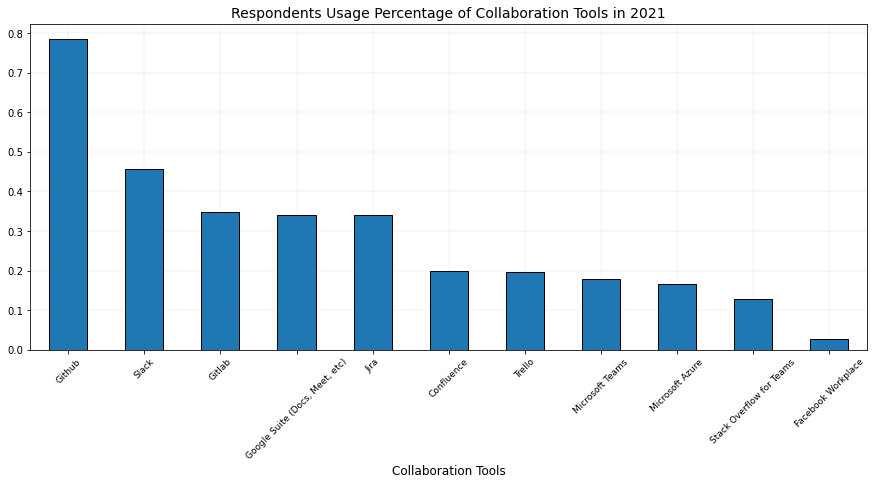

In [66]:
# Visualising 
ct_prcnt_tab_2021.plot(kind='bar',figsize=(15,6), edgecolor = "black")

plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Collaboration Tools", fontsize = 12)
plt.title("Respondents Usage Percentage of Collaboration Tools in 2021", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Respondents Usage Percentage of Collaboration Tools in 2021")
plt.show()

In [67]:
cntry_ct_prcnt_df_2021

,Github,Slack,Gitlab,"Google Suite (Docs, Meet, etc)",Jira,Confluence,Trello,Microsoft Teams,Microsoft Azure,Stack Overflow for Teams,Facebook Workplace
United States,0.799030,0.532090,0.263674,0.385499,0.297397,0.191590,0.168089,0.183686,0.174834,0.098219,0.014543
India,0.787127,0.358955,0.359142,0.338246,0.381157,0.163806,0.175746,0.199067,0.197015,0.309142,0.090112
United Kingdom,0.760922,0.501892,0.277950,0.315101,0.321981,0.200894,0.230478,0.192294,0.203990,0.083247,0.014792
Germany,0.759477,0.344444,0.481373,0.213399,0.387908,0.292157,0.154248,0.211111,0.122549,0.062745,0.005229
Canada,0.779641,0.534731,0.307186,0.405389,0.380240,0.232335,0.192814,0.175449,0.162275,0.095808,0.008982
France,0.769966,0.415700,0.574744,0.330375,0.268942,0.154949,0.216382,0.158362,0.094198,0.092150,0.010922
Brazil,0.856943,0.456385,0.395673,0.411724,0.311933,0.131193,0.362177,0.155618,0.148639,0.119330,0.029309
Netherlands,0.743068,0.493530,0.402033,0.323475,0.346580,0.207024,0.192237,0.170055,0.198706,0.069316,0.012939
Poland,0.757517,0.474297,0.416101,0.302619,0.448109,0.251212,0.191077,0.173618,0.148400,0.054316,0.008729
Australia,0.760563,0.484290,0.266522,0.336945,0.360780,0.251354,0.218852,0.169014,0.157096,0.078007,0.018418


In the next cell, I will provide a visualation of the top five collaboration tools that repondents in the top represented countries want to work in over the next year, that is, the year $2021$.

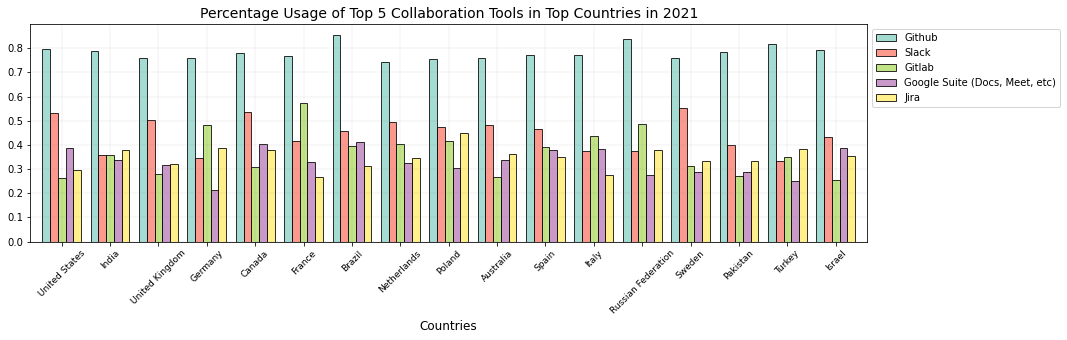

In [68]:
# Visualisation
top = 5 
cntry_ct_prcnt_df_2021.iloc[:,:top].plot.bar(figsize = (15,4), width = 0.8, 
                                           colormap= "Set3", edgecolor = "black", 
                                           alpha = 0.8)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Percentage Usage of Top {} Collaboration Tools in Top Countries in \
2021".format(top), fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.savefig("Percentage Usage of Top {} Collaboration Tools in Top Countries in \
2021".format(top))
plt.show()

* From the graph one can observe that *Github* will continue to be the most preferred collaboration tool in the top countries. The next collaboration tool expected to be used differ is mostly between *Slack* and *Gitlab*. 
* For example: 
  * *Slack* is the second prefered collaboration tool in these countries: 
    * the United States, 
    * the United Kingdom, 
    * Canada, Brazil, 
    * the Netherlands, 
    * Poland, 
    * Australia, 
    * Spain 
    * Sweden, 
    * Pakistan, 
    * Israel.
  * On the other hand, *Gitlab* is the second preferred collaboration tool in the these countries:
    * Germany, 
    * France, 
    * Italy, 
    * Russian Federation, 
    * Turkey.
* In India and Turkey, *Slack* and *Gitlab* are expected to compete in the 2021.

<a id='conclusion'></a>
## Conclusion

In this short survey, I observed the following: 


1. How does the distribution of the respondents in the survey correspond to their  countries (resp. continents) and whether the distribution well represent the population of the countries (resp. continents)? 

   * Most of the respondents of the the survey lived in the one of the following countries: 
     * The United States; 
     * India; 
     * The United Kingdom; 
     * Germany; and 
     * Canada.
   
   * With respondents density measure I observed that respondents from the following countries: Sweden, the Netherlands, Israel, Canada and the United Kingdom were most interested in the survey. That is, they represent their population fairly well. Although the United States and India have more respondents, the value for their respondents density indicated that they did not represent their population fairly well.
   
   * On the continent level, the European continent had most of the respondents of this survey. On the other hand, Oceania is the only continent that is well represented based on the respondent density measure. 


2. What are the most popular database environments (that are currently being worked on, and desired to be work in over the next year) among the respondents in the survey as well as those in countries that are mostly represented? 

    * On the worldwide scale, *MySQL* is the the most popular database environment among the respondents up until the year $2020$. But there is a high likelihood that it will be taken over by *PostgreSQL*. A rise in interest of *MongoDB* and *Redis* is expected in $2021$. The reason for the interest was not explored in this study. *Microsoft SQL Server* is expected to be less popular among the respondents in $2021$.


3. What are the most popular collaboration tools (that are currently being worked on, and desired to be work in over the next year) among the respondents in the survey as well as those in countries that are mostly represented? 

    * *Github* and *Slack* continues to the be most preferred collaborating tool among the respondents. However, *Jira* is expected to be less popular among the respondents in $2021$.